# Paired Samples t-test

### Set up Python libraries

As usual, run the code cell below to import the relevant Python libraries

In [1]:
# Set-up Python libraries - you need to run this but you don't need to change it
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import seaborn as sns
sns.set_theme(style='white')
import statsmodels.api as sm
import statsmodels.formula.api as smf

## Example

<img src="https://raw.githubusercontent.com/jillxoreilly/StatsCourseBook/main/images/horror.jpg" width=30% alt="There should be a picture from a horror movie here" >

A scientist hypothesises that watching horror movies raises the heart rate in human subjects. 
She measures the heart rate of 20 volunteers watching a horror movie, 
and the same volunteers watching a cookery show.

This is a <b>repeated measures</b> design, which is a form of paired design

### Inspect the data

Let's load the data.



In [2]:
# load the data and have a look
heartRates = pd.read_csv('https://raw.githubusercontent.com/jillxoreilly/StatsCourseBook_2024/main/data/HeartRates.csv')
display(heartRates)

,cookery,horror
0,60.4,72.9
1,53.9,57.0
2,54.4,68.3
3,60.0,57.4
4,67.7,58.7
5,56.2,47.0
6,61.9,71.8
7,58.9,62.1
8,65.6,68.6
9,54.6,73.8


### Scatterplot

In the case of paired data, the most effective way to get a sense of the data is a scatterplot:

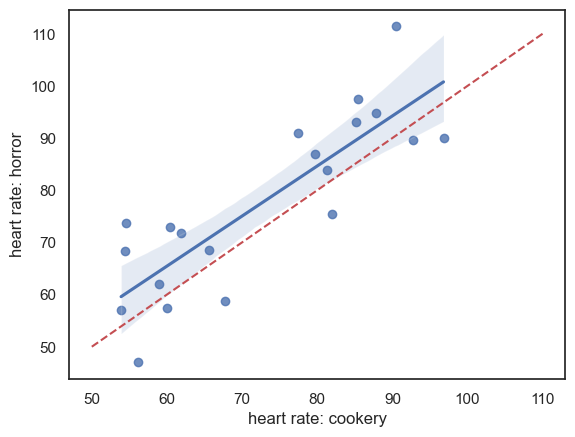

In [3]:
sns.regplot(data = heartRates, x="cookery", y="horror")
plt.xlabel('heart rate: cookery')
plt.ylabel('heart rate: horror')

# add the line x=y (ie a line from point(50,50) to (110,110)) for reference 
plt.plot([50,110],[50,110],'r--')
plt.show()

It looks like
<ul>
    <li> For most individuals heart rate is higher during the horror show (most data points lie above the line x=y)
    <li> There is a strong effect of individual - people with low heart rates during the cookery show also have low heart rates during the horror show (hence data points are stretched out along the line x=y)   
</ul>

It looks like individual differences in heart rate rather dwarf the effect of the type of TV show being watched. 
Therefore it is a good thing that we used a paired design, in which these individual differences are controlled for (as we only look at the change in heart rate between conditions for each individual).

### Check assumption of normality

In the case of paired data, the assumption of the t-test is that 
the differences between conditions (for each participant) are normally distributed - let's add a column to our <tt>pandas</tt> data frame to contain the differences

In [4]:
heartRates['diff'] = heartRates.horror - heartRates.cookery
heartRates

,cookery,horror,diff
0,60.4,72.9,12.5
1,53.9,57.0,3.1
2,54.4,68.3,13.9
3,60.0,57.4,-2.6
4,67.7,58.7,-9.0
5,56.2,47.0,-9.2
6,61.9,71.8,9.9
7,58.9,62.1,3.2
8,65.6,68.6,3.0
9,54.6,73.8,19.2


Now let's plot the differences to get a sense of whether they are normally distributed.

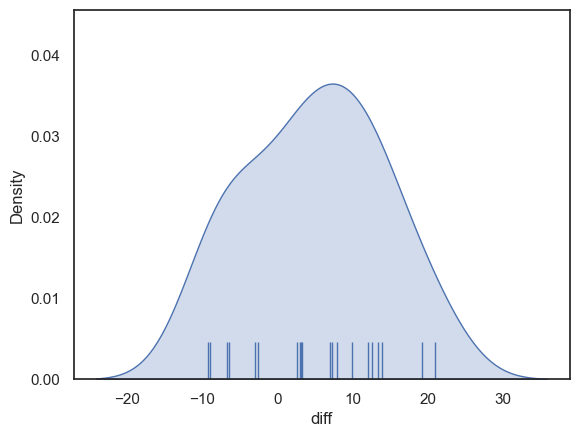

In [5]:
sns.kdeplot(data = heartRates,  x='diff', fill=True)
sns.rugplot(data = heartRates, x='diff', height=0.1,)
plt.show()

The distribution looks fairly normal - for the sake of this example we can safely go ahead and use the t-test (although in real life I think it is always tricky to know if the data are really normally distributed, especially if the sample is small)

### Hypotheses

$\mathcal{H_o}$: the mean difference in heart rate for an individual watching cookery or horror shows is zero

$\mathcal{H_a}$: the mean difference in heart rate is positive (higher heart rate for horror)
    
This is a one tailed test as the researcher's hypothesis (described above) is directional - 
she thinks horror movies increase heart rate

We will test at the $\alpha = 0.05$ significance level

### Descriptive statistics

First, we obtain the relevant desriptive statistics. 
By relevant, I mean the ones that go into the equation for the t-test:

$$ t = \frac{\bar{d}}{\frac{s_d}{\sqrt{n}}} $$

This would be the means difference in heart rate for horror-cookery $\bar{d}$,
the standard deviations of the differences $s_d$ and the number of participants $n$.

We obtain the descriptive statistics for each column in our dataframe using the <tt>describe()</tt> method as before:

In [6]:
heartRates.describe()

,cookery,horror,diff
count,20.000000,20.000000,20.000000
mean,72.620000,77.560000,4.940000
std,14.612489,16.678047,9.049013
min,53.900000,47.000000,-9.200000
25%,59.725000,66.750000,-2.700000
50%,72.600000,74.600000,5.100000
75%,85.250000,90.300000,12.125000
max,96.800000,111.400000,20.900000


So the mean difference is 4.94 beats per minute (higher in the horror condition). This is quite large compared to the mean heart rate in each condition (72.6 bpm in the cookery condition and 77.5 in the horror condition) - more than 5% difference. So on average the horror movie is producing quite a noticeable increase in heart rate. **Because the difference in mean heart rate is better understoon in the cotext of knowing the mean in each condition, I think it is good practice to report the condition means** (mean for cookery and horror) **even though thhey don't get used in the t-test.**

The standard deviation of differences is 9.04 bpm. This is lower than the standard deviation within each condition (14.6 and 16.7 for cookery and horror), which reflects the correlation between heart rates in the two conditions, as seen in the scatter plot above.

The number of participants is 20.

### Carry out the test

We carry out a paired samples t-test using the function `stats.ttest_rel` (that's <tt>rel</tt> for related samples) from `scipy.stats`.

In [7]:
stats.ttest_rel(heartRates.horror, heartRates.cookery, alternative='greater')

TtestResult(statistic=2.4414101572270717, pvalue=0.012293439285066588, df=19)

The inputs to stats.ttest are the two samples to be compared (columns from our Pandas data frame <tt>heartRates</tt>) 
and the argument <tt>alternative='greater'</tt>, which tells the computer to run a one tailed test 
that mean of the first input <tt>heartRate.horror</tt> is greater than the second <tt>heartRate.cookery</tt>.

The outputs are <tt>statistic</tt> ($t=2.44$) and <tt>pvalue</tt> ($p=0.0122$) - if this is less than our $\alpha$ value 0.5, there is a significant difference


### Degrees of freedom

In a scientific write-up we also need to report the degrees of freedom of the test. This tells us how many observations (data-points) the test was based on, corrected for the number of means we had to estimate from the data in order to do the test.

In the case of the paired samples t-test $df = n-1$ where $n$ is the number of pairs, so in this case, df=19 and we can report out test results as:

$t(19) = 2.44, p=0.0122$ (one-tailed)

### Interpretation

Our t value of 2.27 means that the mean increase in heart rate from the cookery to horror conditions is 2.27 times the standard error (where $ SE = \frac{s}{\sqrt{n}}$). 

Such a large difference (in the expected direction) would occur 0.0123 (1.23%) of the time due to chance if the null hypothesis were true (if the TV show made no difference to the heart rate), hence the p value of 0.0123.

This diagram shows the expected distribution of t-values if the null hypothesis was true, with our obtained t-value marked:

<img src="https://raw.githubusercontent.com/jillxoreilly/StatsCourseBook/main/images/ttestHorror.png" width=50% alt="There should be a picture of the t-distribution here" >





## Write-up 
<br>

<div style = "    padding-top: 10px;
    padding-bottom: 10px;
    padding-left: 10px;
    padding-right: 10px;
    box-shadow: 0px 8px 16px 0px rgba(0,0,0,0.2);
    vertical-align: middle;">
    
Above, I walked you through how to run the t-test and why we make different choices. 
    
In this section we practice writing up our analysis in the correct style for a scientific report. 
    
Replace the XXXs with the correct values!    

</div>

<br>

We tested the hypothesis that heart rate increases when watching a horror show as opposed to a cookery show.

For 20 participants, average heart rate was measured over 30min watching a horror show and, on a separate day, 30min watching a cookery show (repeated measures design). The order of conditions was counterbalanced.

Data are shown below - there appears to be a strong effect of resting heart rate (individuals with high heart rates in one condition have high heart rates in the other condition) and heart rates are generally higher in the horror condition:


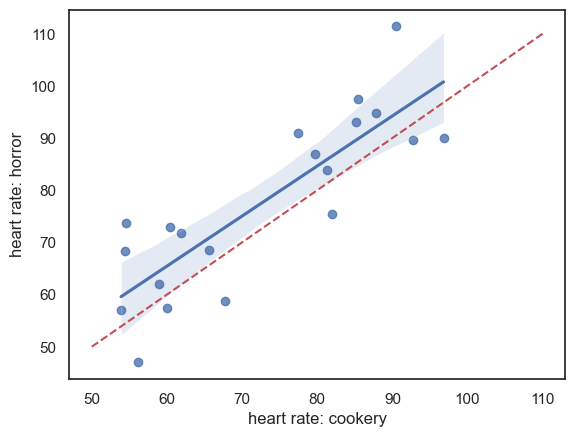

In [8]:
sns.regplot(data = heartRates, x="cookery", y="horror")
plt.xlabel('heart rate: cookery')
plt.ylabel('heart rate: horror')

# add the line x=y (ie a line from point(50,50) to (110,110)) for reference 
plt.plot([50,110],[50,110],'r--')
plt.show()

**Note** - *the red dashed line is the line of equality $(x=y)$; heart rate is generally higher for each individual in the horror condition (most points lie above teh line $(x=y)$. There is a strong correlation between the two measures of heart rate for each individual, indicating an individual differences in heart rate regardless of condition, which should be controlled by the use of a repeated measures design.*

The mean increase in heart rate in the horror condition was X.XX beats per minute (condition means were XX.X bpm for cookery and XX.X for horror). The standard deviation of differences in heart rate was X.XX bpm (condition standard deviations were XX.X bpm for cookery and XX.X for horror). 


In [9]:
heartRates = pd.read_csv('https://raw.githubusercontent.com/jillxoreilly/StatsCourseBook_2024/main/data/HeartRates.csv')
heartRates['diff'] = heartRates.horror - heartRates.cookery
heartRates.describe()

,cookery,horror,diff
count,20.000000,20.000000,20.000000
mean,72.620000,77.560000,4.940000
std,14.612489,16.678047,9.049013
min,53.900000,47.000000,-9.200000
25%,59.725000,66.750000,-2.700000
50%,72.600000,74.600000,5.100000
75%,85.250000,90.300000,12.125000
max,96.800000,111.400000,20.900000


The differences in heart rate were determined by inspection to be approximately normally distrbuted:

Text(0, 0.5, 'Density')

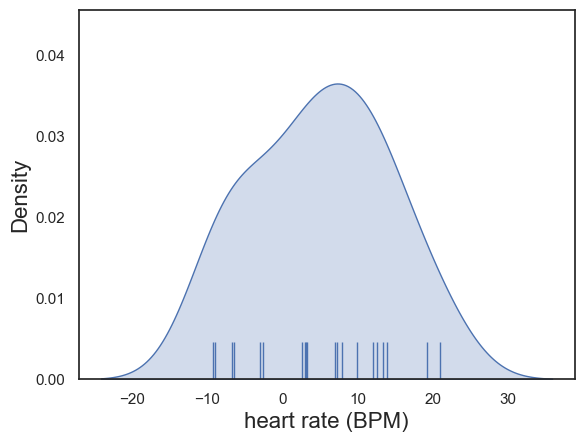

In [10]:
plot = sns.kdeplot(data = heartRates,  x='diff', fill=True)
sns.rugplot(data = heartRates, x='diff', height=0.1,)
plot.set_xlabel("heart rate (BPM)", fontsize = 16)
plot.set_ylabel("Density", fontsize = 16)

An paired samples t-test was therefore used to compare the means (alpha = XXX, XXX-tailed). 

In [11]:
stats.ttest_rel(heartRates.horror, heartRates.cookery, alternative='greater')

TtestResult(statistic=2.4414101572270717, pvalue=0.012293439285066588, df=19)

Heart rates were indeed significantly increased in the horror condition: t(19) = X.XX, p=X.XXX.

As p<0.05 we conclude that on average, individuals' heart rates increase when watching horror shows as opposed to cookery shows.


## Further Exercises
<ol>
<li> What do you think would happen if you ran an independent samples t-test on the data - would the p value become more or less significant? Why?
<li> Change the code to actually run an independent samples test. Was you intuition correct?
</ol>
